In [1]:
## Ali Albaaj NE 155 HW6
# Problem 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

def DiffEqnSolve(a, D, SIGMA, h, flux):
    
    grid = np.arange(-a+h, a+h, h) # creates grid
    steps = 2*a/h
    steps = int(steps)
    diagonal = -2 * np.identity(steps)
    triDiag = tridiag(diagonal)
    matrix = (-D/np.power(h,2)) * triDiag + SIGMA * np.identity(steps) # create of Finite Difference Matrix
    
    source = np.zeros(steps)
    # creation of source term
    for i in range(steps):
        if isinstance(flux, float):
            source[i] = flux
        else:
            source[i] = np.cos(grid[i])

    solution = thomas(matrix, source)
    
    return grid, solution

def thomas(A, b):
    subDiag = np.diagonal(A, -1)
    supDiag = np.diagonal(A, 1)
    diag = np.diagonal(A)
    N = len(b)
    temp = np.zeros(N)
    solution = temp.copy()
    scalar = diag[0]
    solution[0] = b[0]/scalar
    
    for i in range(1,N):
    
        temp[i-1] = supDiag[i-1]/scalar;
        scalar = diag[i] - subDiag[i-1]*temp[i-1];
        solution[i] = (b[i] - subDiag[i-1]*solution[i-1])/scalar;
    

    for j in range(N-2,0,-1):
    
        solution[j] = solution[j] - temp[j]*solution[j+1];
        
    return solution

def tridiag(A):
    for i in range(len(A)-1):
        A[i+1][i] = 1
    for i in range(len(A)-1):
        A[i][i+1] = 1
    return A
    
a = 4
D = 1
sigma = 0.2
h = 0.1
S = 8.0
L = np.sqrt(D/sigma)

# Code's solution of the Diffusion Equation

x1, fluxZero = DiffEqnSolve(a, D, sigma, h, 0.0)
x2, fluxEight = DiffEqnSolve(a, D, sigma, h, S)
x3, fluxCos = DiffEqnSolve(a, D, sigma, h, [0])

# analytical solutions

fluxZeroAna = np.zeros(len(x1))
fluxEightAna = ((-S/sigma)/(np.exp(-a/L) + np.exp(a/L))) * (np.exp(-x2/L) + np.exp(x2/L)) + S/sigma
simpleConstant = (-1/(np.exp(-a/L) + np.exp(a/L))) * (np.cos(a)/(D*(1 + 1/(np.power(L,2)))))
fluxCosAna = simpleConstant * (np.exp(-x3/L) + np.exp(x3/L)) + np.cos(x3)/(D*(1 + 1/np.power(L,2)))

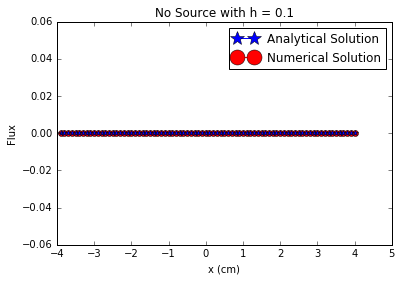

In [2]:
numeric = plt.plot(x1, fluxZero, 'ro', label = 'Numerical Solution')
analytic = plt.plot(x1, fluxZeroAna, 'b*', label = 'Analytical Solution')
plt.ylabel('Flux')
plt.xlabel('x (cm)')
blue_line = mlines.Line2D([], [], color='blue', marker='*', markersize=15, label='Analytical Solution')
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=15, label='Numerical Solution')
plt.legend(handles = [blue_line, red_line])
plt.title('No Source with h = 0.1')

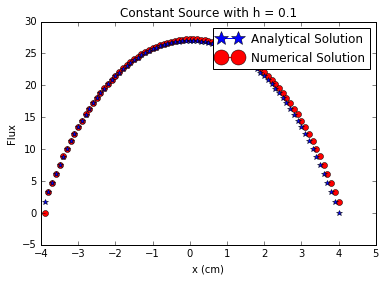

In [3]:
plt.figure(2)
plt.plot(x1, fluxEight, 'ro')
plt.plot(x1, fluxEightAna, 'b*')
plt.ylabel('Flux')
plt.xlabel('x (cm)')
plt.legend(handles = [blue_line, red_line])
plt.title('Constant Source with h = 0.1')
plt.show()

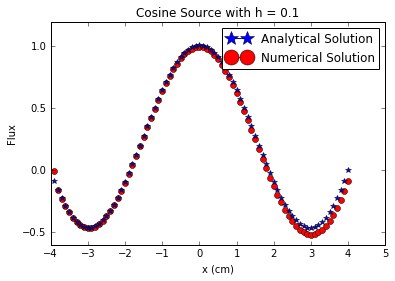

In [4]:
plt.figure(3)
plt.plot(x1, fluxCos, 'ro')
plt.plot(x1, fluxCosAna, 'b*')
plt.ylabel('Flux')
plt.xlabel('x (cm)')
plt.legend(handles = [blue_line, red_line])
plt.title('Cosine Source with h = 0.1')

[ 0.37173369  0.1489723   0.06644507  0.0247859   0.0121053   0.00237581]


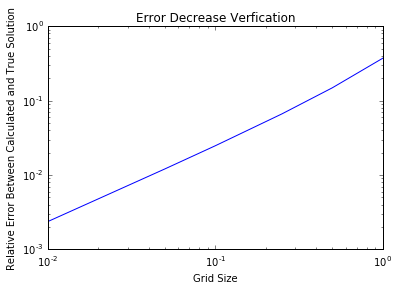

In [5]:
# Problem 3

import numpy as np
import matplotlib.pyplot as plt

a = 4
D = 1
sigma = 0.2
S = 8.0
L = np.sqrt(D/sigma)

h = np.array([1, 0.5, 0.25, 0.1, 0.05, 0.01])
maxRelativeError = np.zeros(len(h))
N = np.zeros(len(h))

for i in range(len(h)):
    
    x1, flux = DiffEqnSolve(a, D, sigma, h[i], S)
    fluxEightAnal = ((-S/sigma)/(np.exp(-a/L) + np.exp(a/L))) * (np.exp(-x1/L) + np.exp(x1/L)) + S/sigma
    maxRelativeError[i] = 1/max(abs((fluxEightAnal - flux) / flux))


print(maxRelativeError)
plt.loglog(h, maxRelativeError)
plt.ylabel('Relative Error Between Calculated and True Solution')
plt.title('Error Decrease Verfication')
plt.xlabel('Grid Size')
plt.show()

8


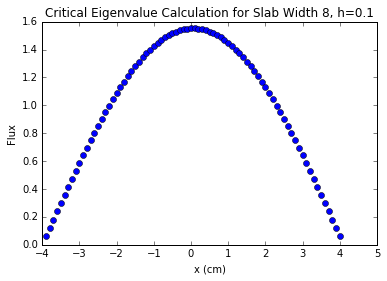

In [3]:
# Problem 4

import numpy as np

def Gauss(A, b, tolerance, iterance, crit):
    
    solution = np.zeros(len(A))
    
    for i in range(iterance):
        
        prev = solution.copy()
        
        for j in range(len(A)):
            
            cross = 0
            
            for k in range(len(A)):
                
                if j != k:
                    cross = cross + A[j][k]*solution[k]
            
            solution[j] = (b[j] - cross)/A[j][j]
        
        if crit == 'absolute':
            error = np.linalg.norm(solution - prev, 2)
        elif crit == 'relative':
            error = np.linalg.norm(solution - prev, 2) / np.linalg.norm(solution, 2)
        
        if error < tolerance:
            break
        
    totalIterance = i
    return solution, totalIterance 

a = 4
D = 1
sigma = 0.7
h = 0.1
vSigma = 0.6

grid = np.arange(-a+h, a+h, h)
steps = 2*a/h
steps = int(steps)
diagonal = -2 * np.identity(steps)
triDiag = tridiag(diagonal)
matrix = (-D/np.power(h,2)) * triDiag + sigma * np.identity(steps) # create Finite Difference Matrix

flux = np.ones(steps)
k = 1.0

kToler = 0.0001
fluxToler = 0.0000000001

for i in range(1000):
    
    kPrev = k
    
    psi, iteran = Gauss(matrix, vSigma * flux, fluxToler, 100000, 'absolute')
    
    
    k = sum(vSigma*psi) / sum(vSigma*flux)
    kResidual = abs(k - kPrev)
    
    flux = (1/k) * psi
    
    if kResidual <= kToler:
        break

print(i)
plt.plot(grid, flux, 'bo')
plt.xlabel('x (cm)')
plt.ylabel('Flux')
plt.title('Critical Eigenvalue Calculation for Slab Width 8, h=0.1')
plt.show()